In [76]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def compute_average(data_path, value="runtime"):
    #open the file 
    file = open(data_path, 'r')
    total = 0
    line_count = 0
    for line in file:
        split_line = line.split()
        if len(split_line) == 6:
            if value == "runtime":
                time = split_line[-1]
                minutes_seconds = time.split('m')
                minutes = float(minutes_seconds[0])
                seconds = float(minutes_seconds[1][:-1])
                total += minutes * 60 + seconds
            elif value == "SP":
                total += float(split_line[1]) 
            elif value == "TC":
                total += float(split_line[4]) 
            line_count += 1
    return total / line_count

def plot_comparison(datasets, tools, value="runtime", title=""):
    get_size = lambda data_path : len([name for name in os.listdir(data_path) if name.endswith(".fasta")])
    expected_sizes = [get_size("./data/"+dataset+"/train/") for dataset in datasets]
    #runtimes per tool and model
    data = []
    for t in tools:
        for d in datasets:
            data.append((t,d,compute_average("./results/"+t+"/"+t+"."+d+".out", value)))
    df = pd.DataFrame(data, columns=["tools", "datasets", value])
    df = df.pivot("tools", "datasets", value)
    df = df.reindex(tools).T.reindex(datasets).T
    sns.heatmap(df, annot=True, fmt=".1f", linewidth=2)
    plt.title(title)
    plt.show() 

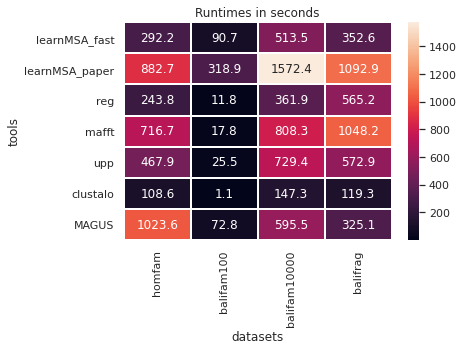

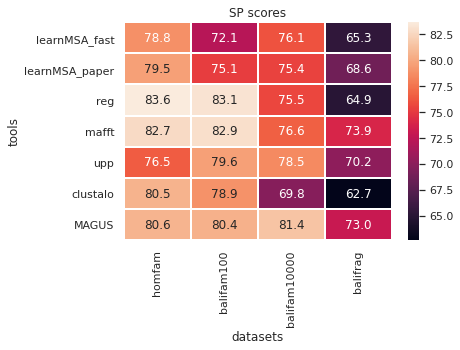

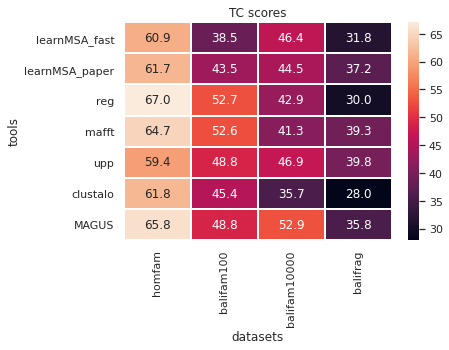

In [77]:
datasets = ["homfam", "balifam100", "balifam10000", "balifrag"]
tools = ["learnMSA_fast", "learnMSA_paper", "reg", "mafft", "upp", "clustalo", "MAGUS"]
plot_comparison(datasets, tools, "runtime", title="Runtimes in seconds")
plot_comparison(datasets, tools, "SP", title="SP scores")
plot_comparison(datasets, tools, "TC", title="TC scores")

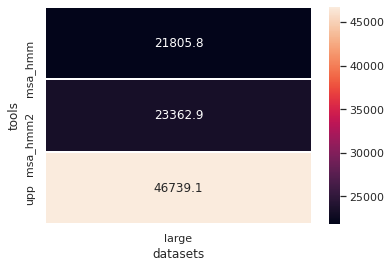

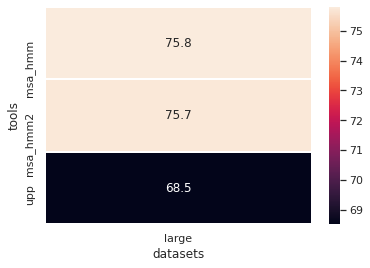

In [60]:
datasets = ["large"]
tools = ["msa_hmm", "msa_hmm2", "upp"]
plot_comparison(datasets, tools, "runtime")
plot_comparison(datasets, tools, "scores")